In this notebook, we study the features of the nela dataset, using the subset of the dataset (4 newsources)

In [ ]:
# Some features can be calculated using: https://github.com/RyleeThompson/unbiasMe/blob/master/helpers.py

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
import seaborn as sns
df = pd.read_csv("subset.csv") # Or just use the full csv file
sources = ["CNN","Fox News","BBC", "Xinhua"]
readibility = [" TTR","SMOG", "FKE","wordlen"]
import matplotlib.pyplot as plt

Below is the list of features within the dataset, we will choose a few to study

In [ ]:
for c in df.columns: 
  print(c)

Unnamed: 0
pid
 source
 date
 Happiness
 HarmVirtue
 HarmVice
 FairnessVirtue
 FairnessVice
 IngroupVirtue
 IngroupVice
 AuthorityVirtue
 AuthorityVice
 PurityVirtue
 PurityVice
 MoralityGeneral
 bias_count
 assertives_count
 factives_count
 hedges_count
 implicatives_count
 report_verbs_count
 positive_op_count
 negative_op_count
 wneg_count
 wpos_count
 wneu_count
 sneg_count
 spos_count
 sneu_count
 TTR
vad_neg
vad_neu
vad_pos
FKE
SMOG
stop
wordlen
WC
NB_pobj
NB_psubj
quotes
Exclaim
AllPunc
allcaps
CC
CD
DT
EX
FW
IN
JJ
JJR
JJS
LS
MD
NN
NNS
NNP
NNPS
PDT
POS
PRP
PRP$
RB
RBR
RBS
RP
SYM
TO
UH
WP$
WRB
VB
VBD
VBG
VBN
VBP
VBZ
WDT
WP
ingest
cause
insight
cogmech
sad
inhib
certain
tentat
discrep
space
time
excl
incl
relativ
motion
quant
number
swear
funct
ppron
pronoun
we
i
shehe
you
ipron
they
death
bio
body
hear
feel
percept
see
filler
health
sexual
social
family
friend
humans
affect
posemo
negemo
anx
anger
assent
nonfl
verb
article
past
auxverb
future
present
preps
adverb
negate
conj
home

## Study of Readibility
First we will look at several measures of difficulty of a text:

1) TTR

2) SMOG

3) FKE

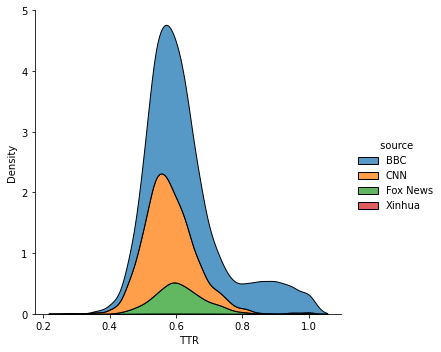

In [ ]:
sns.displot(df, x= " TTR", kind="kde",hue = " source",multiple="stack")

Here is a plot of the TTR feature distribution for each news source. TTR of a text is defined as $$\frac{ \# unique\_words}{\# words}$$. TTR measures the lexical diversity, which can help measure the difficulty of a text. The higher the TTR, the harder it can be for non-native speakers/new speakers to read atext.

Text(0.5, 1.0, 'Mean of TTR')

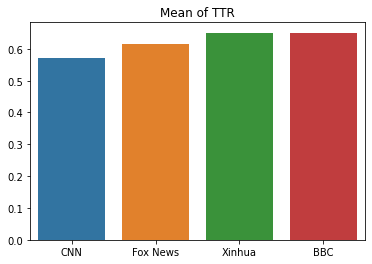

In [ ]:
res = {}
for source in sources:
    res[source] = df[df[" source"] == source][" TTR"].mean()
res = {k: v for k, v in sorted(res.items(), key=lambda item: item[1])}
sns.barplot(x=list(res.keys()), y=list(res.values())).set_title("Mean of TTR")

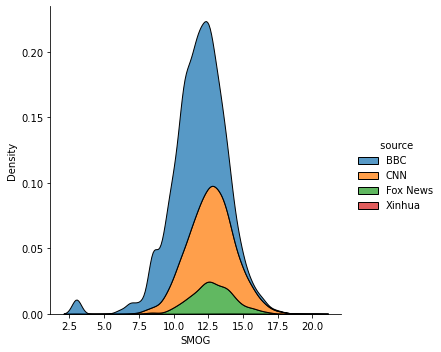

In [ ]:
sns.displot(df, x= "SMOG", kind="kde",hue = " source",multiple="stack")
f.set_titles("SMOG Distribution")

Text(0.5, 1.0, 'Mean of SMOG')

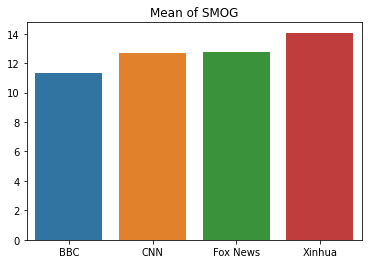

In [ ]:
res = {}
for source in sources:
    res[source] = df[df[" source"] == source]["SMOG"].mean()
res = {k: v for k, v in sorted(res.items(), key=lambda item: item[1])}
sns.barplot(x=list(res.keys()), y=list(res.values())).set_title("Mean of SMOG")


Description of SMOG:

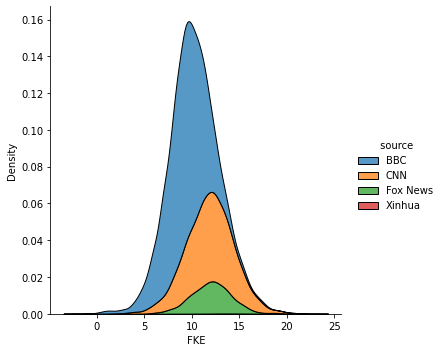

In [ ]:
f = sns.displot(df, x= "FKE", kind="kde",hue = " source",multiple="stack")
f.set_titles("FKE Distribution")

Text(0.5, 1.0, 'Mean of FKE')

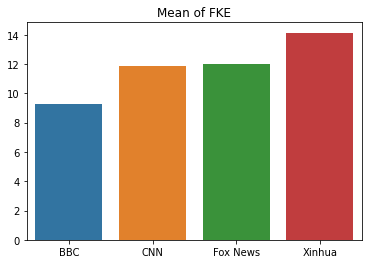

In [ ]:
res = {}
for source in sources:
    res[source] = df[df[" source"] == source]["FKE"].mean()
res = {k: v for k, v in sorted(res.items(), key=lambda item: item[1])}
sns.barplot(x=list(res.keys()), y=list(res.values())).set_title("Mean of FKE")


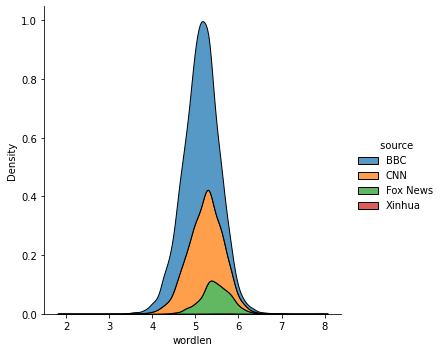

In [ ]:
f= sns.displot(df, x= "wordlen", kind="kde",hue = " source",multiple="stack")
f.set_titles("Avg WordLen Distribution")

Text(0.5, 1.0, 'Mean of Avg WordLen')

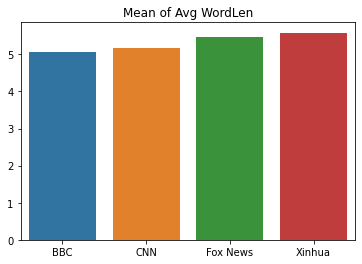

In [ ]:
res = {}
for source in sources:
    res[source] = df[df[" source"] == source]["wordlen"].mean()
res = {k: v for k, v in sorted(res.items(), key=lambda item: item[1])}
sns.barplot(x=list(res.keys()), y=list(res.values())).set_title("Mean of Avg WordLen")


Here is the plot for the average word length of the articles per each newsource

**Some Takeaways**


1.   Xinhua is the hardest to read: longest avg word len per article, highest FKE,SMOG, and TTR Scores
2.   Fox is harder to read than CNN on all metrics.



In [ ]:
r_frame = df[readibility]

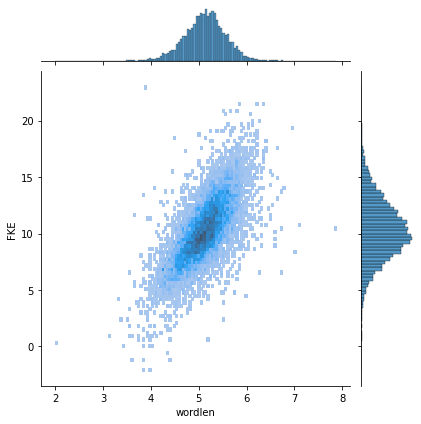

In [ ]:
sns.jointplot(data=r_frame, x="wordlen", y="FKE", kind="hist")

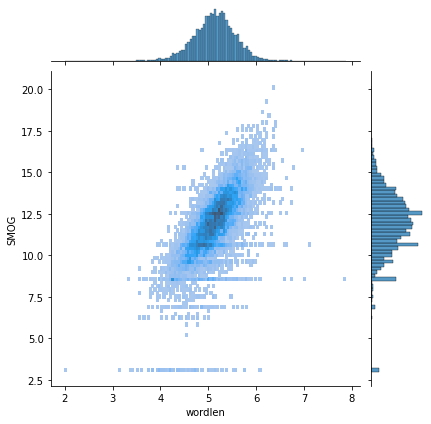

In [ ]:
sns.jointplot(data=r_frame, x="wordlen", y="SMOG", kind="hist")

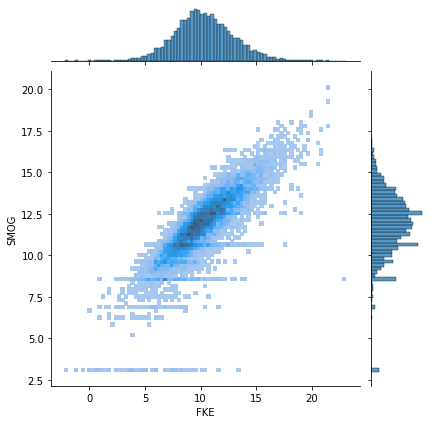

In [ ]:
sns.jointplot(data=r_frame, x="FKE", y="SMOG", kind="hist")

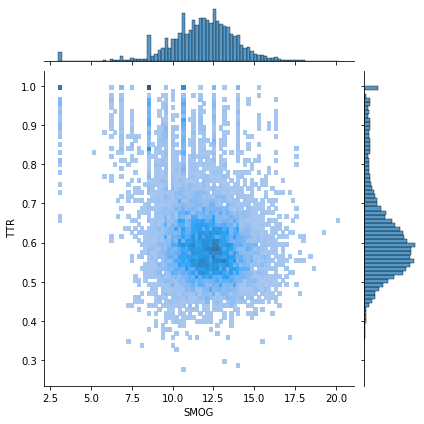

In [ ]:
sns.jointplot(data=r_frame, x="SMOG", y=" TTR", kind="hist")

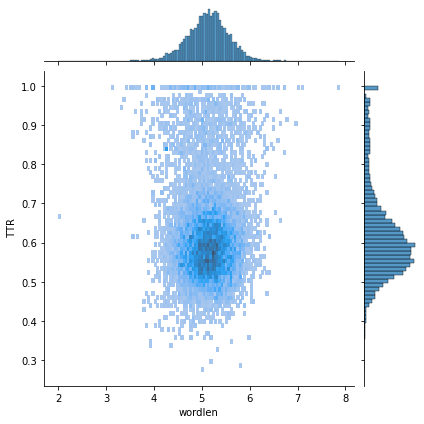

In [ ]:
sns.jointplot(data=r_frame, x="wordlen", y=" TTR", kind="hist")

**Notable correlation for readibility features**


1.   Longer avg wordlen --> Higher SMOG value
2.   Longer avg wordlen --> Higher SKE value
3.   Higher FKE --> Higher SMOG


Interestingly, SMOG and wordlen are quite uncorelalted with TTR score




We will look at the sentiment distribution next



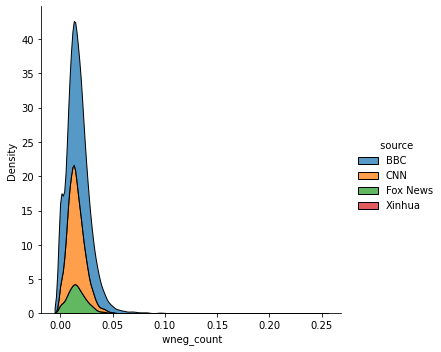

In [ ]:
f= sns.displot(df, x= " wneg_count", kind="kde",hue = " source",multiple="stack")

wneg_count can be calculated using:  wneg_count = float(sum([tokens.count(n) for n in wneg]))/len(tokens)

In other words, go through each token and count the total number of tokens that belong to the negative class and divide that by total number of tokens. The idea is the same for wpos_count and wneu_count

Text(0.5, 1.0, 'Mean of Average Negative Words per Article')

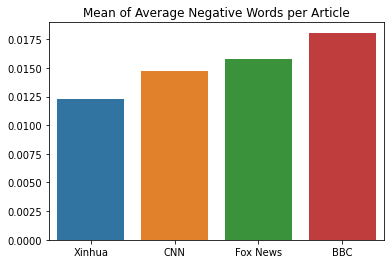

In [ ]:
res = {}
for source in sources:
    res[source] = df[df[" source"] == source][" wneg_count"].mean()
res = {k: v for k, v in sorted(res.items(), key=lambda item: item[1])}
sns.barplot(x=list(res.keys()), y=list(res.values())).set_title("Mean of Average Negative Words per Article")


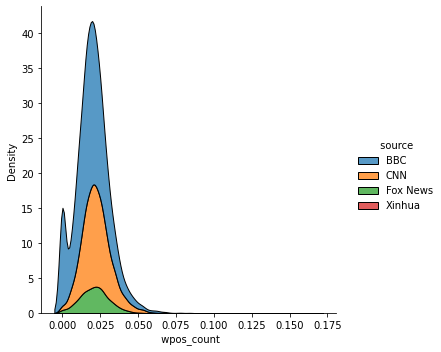

In [ ]:
f= sns.displot(df, x= " wpos_count", kind="kde",hue = " source",multiple="stack")

Text(0.5, 1.0, 'Mean of Average Positive Words per Article')

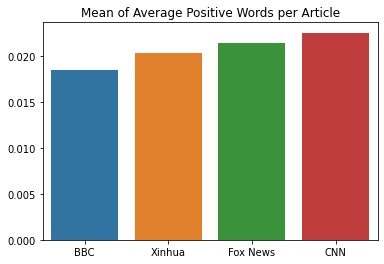

In [ ]:
res = {}
for source in sources:
    res[source] = df[df[" source"] == source][" wpos_count"].mean()
res = {k: v for k, v in sorted(res.items(), key=lambda item: item[1])}
sns.barplot(x=list(res.keys()), y=list(res.values())).set_title("Mean of Average Positive Words per Article")


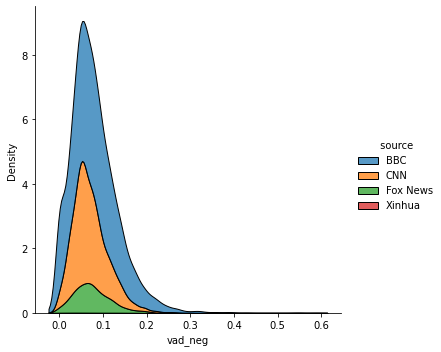

In [ ]:
f= sns.displot(df, x= "vad_neg", kind="kde",hue = " source",multiple="stack")

Text(0.5, 1.0, 'Mean of sentiment calculated using Vader')

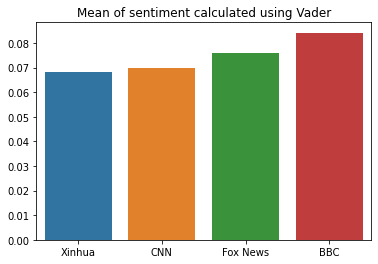

In [ ]:
res = {}
for source in sources:
    res[source] = df[df[" source"] == source]["vad_neg"].mean()
res = {k: v for k, v in sorted(res.items(), key=lambda item: item[1])}
sns.barplot(x=list(res.keys()), y=list(res.values())).set_title("Mean of sentiment calculated using Vader")


**Takeaways**

Firstly: using basic negative word counts

1.   CNN uses, on average, more positive words per article than Fox News.
2.   Fox uses, on average, more negative words per article than CNN.

Note # of positive + negative != # of tokens, there are neutral tokens/words as well


Secondly using Vader:
By using vader to calculate the sentiment on the articles, we observe similar things: Fox has more negative articles than CNN